___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Упражнения по методу KNN

Метод KNN для классификации достаточно простой, поэтому давайте применим наши знания для создания пайплайна и применения GridSearchCV - их можно будет использовать и для других моделей.


## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Наша цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.


Источник данных: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: Выполните ячейки ниже, чтобы загрузить данные.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Исследование данных

**ЗАДАНИЕ: Нарисуйте тепловую карту heatmap, показывающую корреляцию между откликами на различных частотах.**

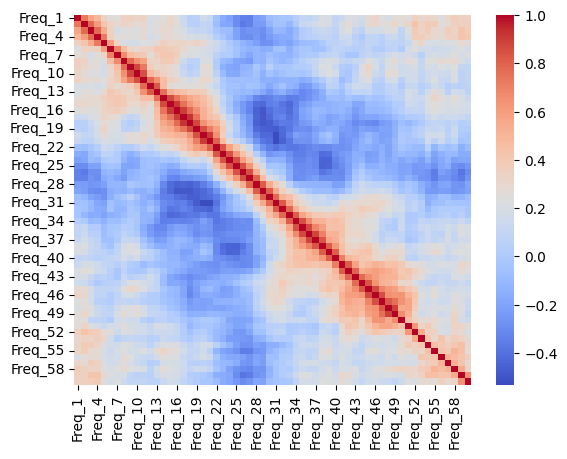

In [5]:
# Напишите Ваш код здесь
sns.heatmap(data=df.corr(numeric_only=True), cmap='coolwarm');

<AxesSubplot:>

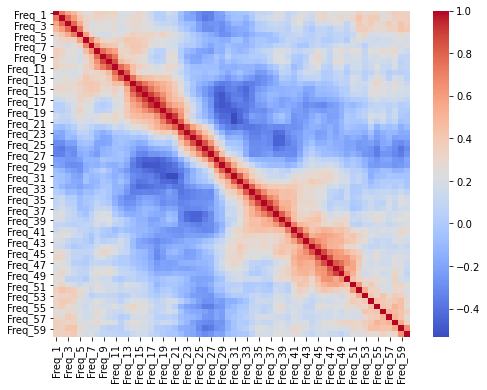

**ЗАДАНИЕ: Какие 5 частот лучше всего коррелируют с целевой переменной?**

*Замечание: Вы можете пометить целевую переменную с помощью значений 0 и 1.*

*Замечание 2: мы ищем **абсолютные** значения корреляции.*

In [51]:
# Напишите Ваш код здесь
df['Target'] = df['Label'].map({'R':0,'M':1})

df.corr(numeric_only=True)['Target'].sort_values(ascending=False)[:6]

Target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Разбиение на обучающий и тестовый наборы данных

Здесь мы будем использовать кросс-валидацию на 90% данных, и затем оценим результаты работы нашей модели на тестовом наборе данных в 10%.

**ЗАДАНИЕ: Разделите данные на признаки и целевую переменную, а затем разбейте все данные на обучающий и тестовый наборы данных, в отношении 90% и 10%.**

In [52]:
# Напишите Ваш код здесь
from sklearn.model_selection import train_test_split

X = df.drop(['Target', 'Label'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


**ЗАДАНИЕ: Создайте объект PipeLine, в котором будет StandardScaler и модель KNN**

---
*Замечание: Если ваша сетка из параметров будет помещаться внутри PipeLine, то название параметра следует указывать в следующем виде:**

* выбранное название строки + **два** нижних подчёркивания + название ключевого параметра
* название модели + __ + название параметра
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[Статья на StackOverflow по этой теме](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline).

Мы делаем это для того, чтобы scikit-learn знал, к какой операции пайплайна относятся эти параметры (иначе он может например подумать, что n_neighbors это параметр для scaler).

---

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [59]:
scaler = StandardScaler()
knn_model = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn_model', knn_model)]

In [60]:
pipeline = Pipeline(operations)

In [61]:
k_values = range(1,30)
param_grid = {'knn_model__n_neighbors': k_values}

In [64]:
full_cv_knn = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
full_cv_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': range(1, 30)},
             scoring='accuracy')

In [65]:
full_cv_knn.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 1,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

**ЗАДАНИЕ: С помощью пайплайна выполните поиск по сетке для различных значений k, и выведите наилучшие параметры.**

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(СЛОЖНОЕ) ЗАДАНИЕ: Используя словарь .cv_results_, попробуйте нарисовать график средних тестовых оценок (mean_test_score) для каждого значения K.**

In [69]:
# Напишите Ваш код здесь
scores = full_cv_knn.cv_results_['mean_test_score']

In [74]:
scores

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 , 0.73812233,
       0.70042674, 0.72759602, 0.68449502, 0.70085349, 0.69530583,
       0.69544808, 0.7113798 , 0.71678521, 0.72204836, 0.71664296,
       0.70071124, 0.69544808, 0.69530583, 0.69004267, 0.68477952,
       0.6688478 , 0.67411095, 0.67411095, 0.6685633 ])

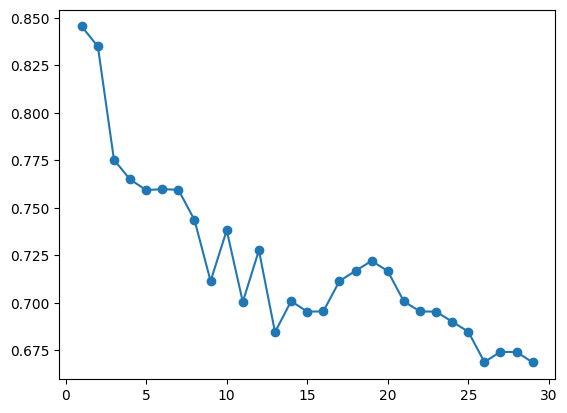

In [75]:
plt.plot(k_values, scores, 'o-')

Text(0, 0.5, 'Accuracy')

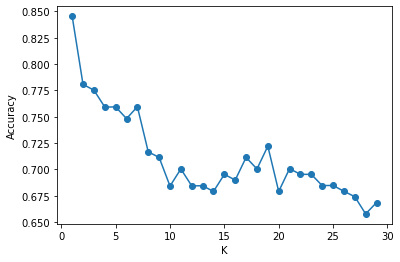

### Финальная оценка модели

**ЗАДАНИЕ: используя объект grid classifier с предыдущего шага, создайте финальный отчёт "classification report" и матрицу "confusion matrix".**

In [76]:
# Напишите Ваш код здесь
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
y_pred = full_cv_knn.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



array([[ 7,  1],
       [ 1, 12]])

array([[12,  1],
       [ 1,  7]], dtype=int64)

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Отличная работа!